# Simple Linear Regression with Dataset from Kaggle
> link : https://www.kaggle.com/datasets/andonians/random-linear-regression

<br>

### Import the required libraries (numpy, pandas and matplotlib)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>

### Read data and divide it into train and test set, then plot it using Matplotlib.

In [2]:
train = pd.read_csv("simple linear regression dataset/train.csv")
test = pd.read_csv("simple linear regression dataset/test.csv")

X_train = train['x']
Y_train = train['y']
X_test = test['x']
Y_test = test['y']

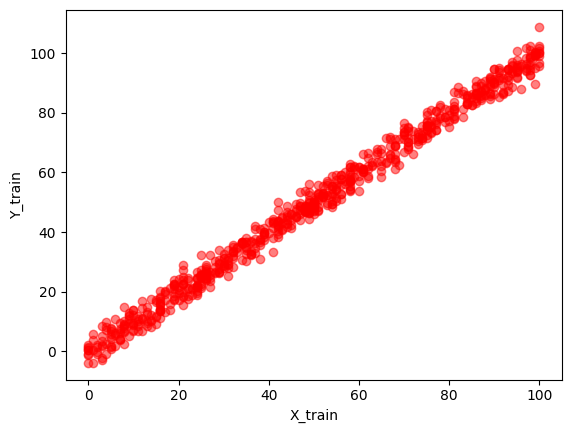

In [3]:
from matplotlib import pyplot as plt
plt.scatter(X_train, Y_train, c= "red", alpha=.5, marker= 'o')
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.show()

<br>

### Define a function mean_squared_error
This section defines a function mean_squared_error to calculate the mean squared error between the true values (y_true) and the predicted values (y_predicted).

In [4]:
def mean_squared_error(y_true, y_predicted):
    # Calculate the mean squared error
    cost = np.sum((y_predicted - y_true) ** 2) / len(y_true)
    return cost

<br>

### Define the main linear regression function
This section defines the main linear regression function using gradient descent. It initializes weights and bias, performs gradient descent, and updates weights and bias iteratively. It also includes a mechanism to adjust the learning rate based on the cost function's behavior during training.

In [5]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=2000, stopping_threshold=1e-6, verbose=True):
    # Initialize weights and bias
#    weights = np.zeros((X.shape[1], 1))
    weights = 0
    bias = 0
    curr_cost = 0
    prev_cost = 0
    
    # Number of samples
    m = len(y)
    
    # Gradient Descent
    for i in range(num_iterations):

        y_pred = np.dot(X, weights) + bias
        curr_cost = mean_squared_error(y, y_pred)
        
        if i>0 and abs(prev_cost - curr_cost) <= stopping_threshold:
            break
        
        if i>0 and curr_cost > prev_cost:
            if verbose: print("Learning rate too large....Objective function is increasing....\nReducing learning rate....")
            learning_rate = learning_rate*0.5
        prev_cost = curr_cost
        
        
        # Calculate gradients
        dW = (2/m) * np.dot(X.T, (y_pred - y))
        db = (2/m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * db
        
        if verbose:
            print(f"Iteration {i}: Cost {curr_cost}  Weigths: {weights}  Bias: {bias}")
    
    return weights, bias

<br>

### Call the linear_regression function
This section calls the linear_regression function to estimate the weight and bias using the provided data. The code also makes predictions for the test set using the estimated parameters and calculates the mean squared error for both, the test set and the train set.

In [6]:
estimated_weight, estimated_bias = linear_regression(X_train, Y_train)
print(f"\nEstimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Make predictions using estimated parameters
Y_pred = estimated_weight * X_test + estimated_bias

mse_test = mean_squared_error(Y_test, Y_pred)
print(f"\nMean Squared Error on test set: {mse_test}")
mse_train = mean_squared_error(Y_train, (estimated_weight * X_train + estimated_bias))
print(f"Mean Squared Error on train set: {mse_train}")

Iteration 0: Cost 3340.1248261786727  Weigths: 66.70849169037075  Bias: 0.9987973834091561
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 1: Cost 14421741.229174916  Weigths: -2127.565171541817  Bias: -31.875581161887183
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 2: Cost 15133259758.885996  Weigths: 33412.5072292143  Bias: 500.57697532512447
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 3: Cost 3728646591383.174  Weigths: -245519.06852166413  Bias: -3678.30803208022
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 4: Cost 201341382293110.8  Weigths: 779326.8988213672  Bias: 11675.684601682924
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 5: Cost 2028603994078864.0  Weigths: -847198.0007792574  Bias: -12692.5153074399

<br>

### Plot the regression line on Training data
This section plots the train data points and overlays the regression line based on the estimated weight and bias. The resulting plot provides a visual representation of the linear regression model fitted to the data.

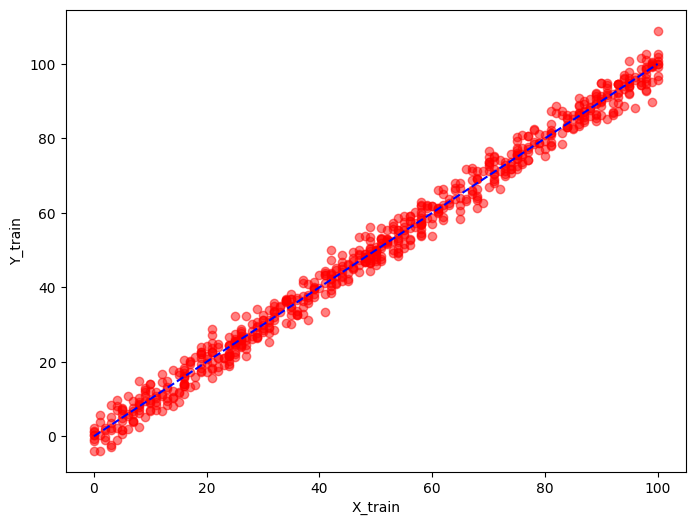

In [7]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, marker='o', color='red', alpha=.5)
plt.plot([min(X_train), max(X_train)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red',markersize=10, linestyle='dashed')
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.show()

<br>

### Plot the regression line on Testing data
This section plots the test data points and overlays the regression line based on the estimated weight and bias. The resulting plot provides a visual representation of the linear regression model fitted to the data.

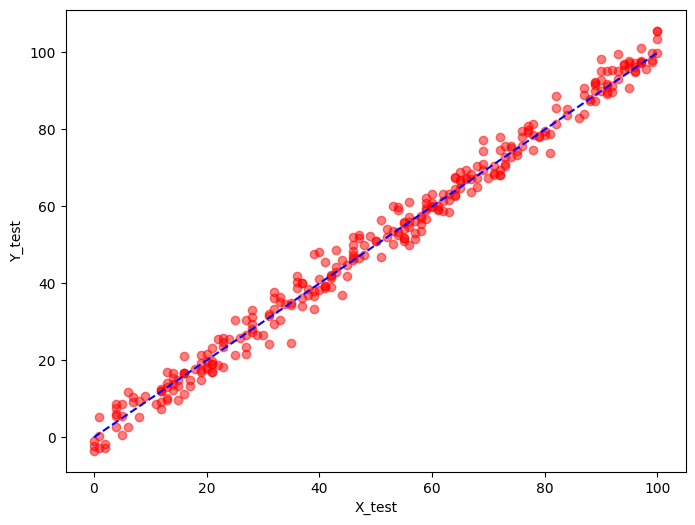

In [8]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, marker='o', color='red', alpha=.5)
plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red',markersize=10, linestyle='dashed')
plt.xlabel("X_test")
plt.ylabel("Y_test")
plt.show()